## TP 03 : Data visualization

### Exercise 01 :
Let us consider the data set of Amazon Ratings from Kaggle.
https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings

In [30]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
# Load the data
import pandas as pd

df = pd.read_csv("ratings_Beauty.csv")
df

UserId   ProductId  Rating   Timestamp
0        A39HTATAQ9V7YF  0205616461     5.0  1369699200
1        A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2        A1Z513UWSAAO0F  0558925278     5.0  1404691200
3        A1WMRR494NWEWV  0733001998     4.0  1382572800
4        A3IAAVS479H7M7  0737104473     1.0  1274227200
...                 ...         ...     ...         ...
2023065  A3DEHKPFANB8VA  B00LORWRJA     5.0  1405296000
2023066  A3DEHKPFANB8VA  B00LOS7MEE     5.0  1405296000
2023067   AG9TJLJUN5OM3  B00LP2YB8E     5.0  1405382400
2023068   AYBIB14QOI9PC  B00LPVG6V0     5.0  1405555200
2023069  A1PB6OT0OOPKNQ  B00LU0LTOU     5.0  1405641600

[2023070 rows x 4 columns]

In [32]:
# Filter rows to pick up the 10 highest sold products.
# i.e the productd is that appear the most
products_count = df["ProductId"].value_counts()
highest_sold_prods = products_count.head(10).reset_index()
print(highest_sold_prods)
print(type(highest_sold_prods))

    ProductId  count
0  B001MA0QY2   7533
1  B0009V1YR8   2869
2  B0043OYFKU   2477
3  B0000YUXI0   2143
4  B003V265QW   2088
5  B000ZMBSPE   2041
6  B003BQ6QXK   1918
7  B004OHQR1Q   1885
8  B00121UVU0   1838
9  B000FS05VG   1589
<class 'pandas.core.frame.DataFrame'>


In [33]:
# Transform the data so we have days instead of timestamps.
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")
print(df)

                 UserId   ProductId  Rating  Timestamp
0        A39HTATAQ9V7YF  0205616461     5.0 2013-05-28
1        A3JM6GV9MNOF9X  0558925278     3.0 2012-12-14
2        A1Z513UWSAAO0F  0558925278     5.0 2014-07-07
3        A1WMRR494NWEWV  0733001998     4.0 2013-10-24
4        A3IAAVS479H7M7  0737104473     1.0 2010-05-19
...                 ...         ...     ...        ...
2023065  A3DEHKPFANB8VA  B00LORWRJA     5.0 2014-07-14
2023066  A3DEHKPFANB8VA  B00LOS7MEE     5.0 2014-07-14
2023067   AG9TJLJUN5OM3  B00LP2YB8E     5.0 2014-07-15
2023068   AYBIB14QOI9PC  B00LPVG6V0     5.0 2014-07-17
2023069  A1PB6OT0OOPKNQ  B00LU0LTOU     5.0 2014-07-18

[2023070 rows x 4 columns]


Timestamp
1998-10-19    4.000000
1998-11-29    5.000000
1999-03-16    5.000000
1999-06-03    5.000000
1999-09-14    4.000000
                ...   
2014-07-19    4.151601
2014-07-20    4.167598
2014-07-21    4.226611
2014-07-22    4.273102
2014-07-23    4.273723
Name: Rating, Length: 4231, dtype: float64


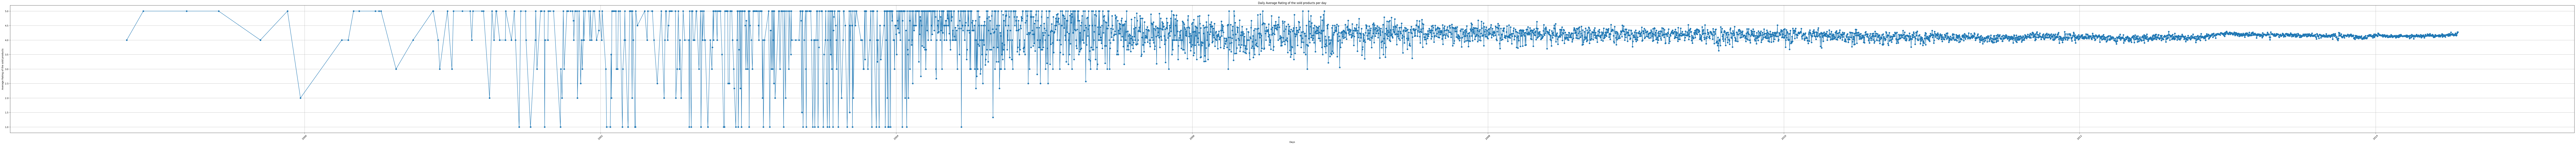

In [34]:
import matplotlib.pyplot as plt

## Draw a line graph representing the averaging rating of the products.
average_ratings = df.groupby("Timestamp")["Rating"].mean()
print(average_ratings)

# Create a line graph
plt.figure(figsize=(200, 10))
plt.plot(average_ratings.index, average_ratings.values, marker="o", linestyle="-")
plt.xlabel("Days")
plt.ylabel("Average Rating of the sold products")
plt.title("Daily Average Rating of the sold products per day")
plt.grid(True)
plt.xticks(rotation=45)
# Show the graph
plt.show()

In [35]:
import matplotlib.pyplot as plt

avg_rating_per_prod = df.groupby("ProductId")["Rating"].mean().reset_index()
print(avg_rating_per_prod)

         ProductId  Rating
0       0205616461     5.0
1       0558925278     4.0
2       0733001998     4.0
3       0737104473     1.0
4       0762451459     5.0
...            ...     ...
249269  B00LORWRJA     5.0
249270  B00LOS7MEE     5.0
249271  B00LP2YB8E     5.0
249272  B00LPVG6V0     5.0
249273  B00LU0LTOU     5.0

[249274 rows x 2 columns]


Index(['B001MA0QY2', 'B0009V1YR8', 'B0043OYFKU', 'B0000YUXI0', 'B003V265QW',
       'B000ZMBSPE', 'B003BQ6QXK', 'B004OHQR1Q', 'B00121UVU0', 'B000FS05VG'],
      dtype='object', name='ProductId')


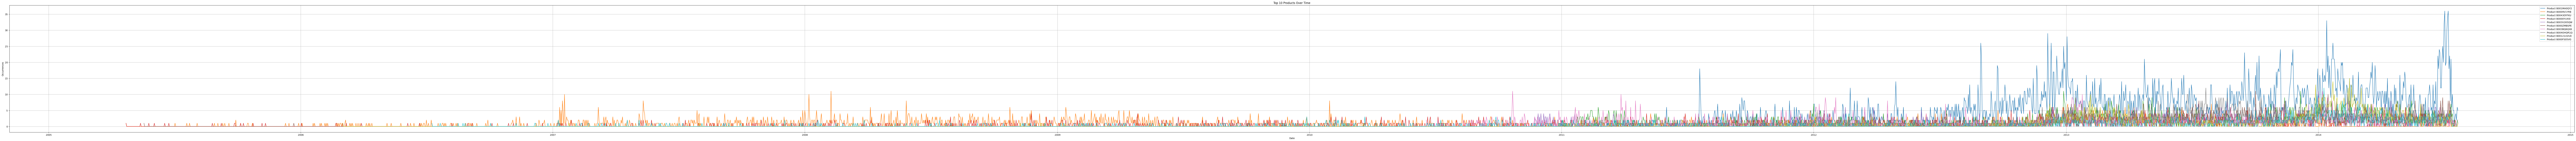

In [36]:
# Draw a multi-line graph representing the selling number of each product by day.
# X : the days and Y : each line represents the the count of sales per day for P1...P10

product_counts = df["ProductId"].value_counts()
top_10_products = product_counts.nlargest(10).index
print(top_10_products)
data_to_plot = {}

for product_id in top_10_products:
    product_data = df[df["ProductId"] == product_id]
    product_data = product_data.set_index("Timestamp").resample("D").size()
    data_to_plot[product_id] = product_data

# Step 3: Create the multiline graph
plt.figure(figsize=(200, 10))

for product_id, product_data in data_to_plot.items():
    plt.plot(product_data.index, product_data, label=f"Product {product_id}")

plt.xlabel("Date")
plt.ylabel("Occurrences")
plt.title("Top 10 Products Over Time")
plt.legend()
plt.grid(True)
plt.show()

   Rating    count
0     5.0  1248721
1     4.0   307740
2     1.0   183784
3     3.0   169791
4     2.0   113034


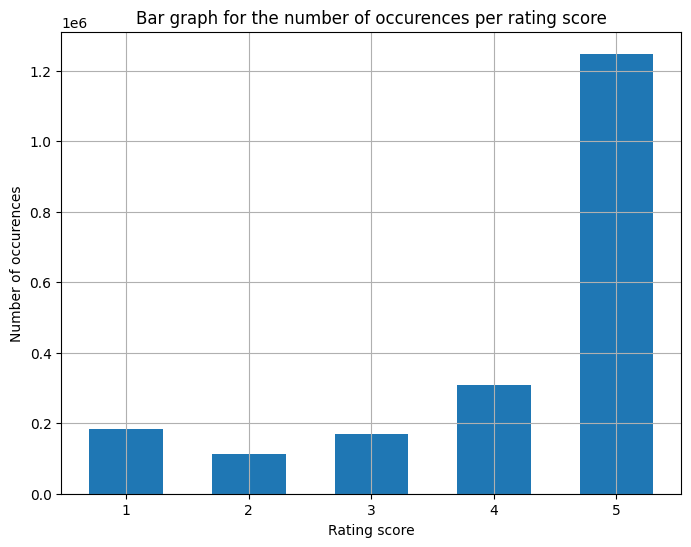

In [37]:
# Draw a bar graph representing the number of occurrences of each rating value.
# On X axis : the different rating values : 1,2,3,4,5
# On Y axis : the occurence of each rating value
ratings = df["Rating"].value_counts().reset_index()
print(ratings)
# print(ratings['Rating'])
plt.figure(figsize=(8, 6))
plt.bar(ratings["Rating"], ratings["count"], width=0.6)
plt.xlabel("Rating score")
plt.ylabel("Number of occurences")
plt.title("Bar graph for the number of occurences per rating score")
plt.grid(True)

plt.show()

<h3> Exercise 02 : </h3> <br>
Let us consider a data structure as in the next table. <br>
Date       |  Temprature <br>
------------------------ <br>
01/01/2023 |   23 <br>
02/01/2023 |   27 <br>
03/01/2023 |   29 <br>

Create python script that generates synthetic data as shown in the table.

In [38]:
import numpy as np
import random
from datetime import datetime, timedelta


def generate_synth_date(k: int = 365):
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 12, 31)
    date_range = [
        start_date + timedelta(days=x) for x in range((end_date - start_date).days + 1)
    ]
    # Generate synthetic data
    data = {
        "date": random.sample(date_range, k=k),
        "temperature": np.random.randint(
            10, 31, k
        ),  # 100 random temperatures between 10 and 30 (inclusive)
    }

    df = pd.DataFrame(data)
    # Load it to a csv file
    df.to_csv("synthetic_temp_data.csv", index=False)


generate_synth_date()

Smoothing techniques reduce the volatility in a data series, which allows analysts to identify important economic trends. The moving average technique offers a simple way to smooth data; however, because it utilizes data from past time periods, it may obscure the latest changes in the trend.

In [39]:
temp_df = pd.read_csv("synthetic_temp_data.csv")
temp_df

date  temperature
0    2023-12-16           21
1    2023-05-23           28
2    2023-03-06           14
3    2023-08-23           30
4    2023-08-01           25
..          ...          ...
360  2023-03-18           22
361  2023-05-06           14
362  2023-04-08           29
363  2023-03-24           19
364  2023-10-23           15

[365 rows x 2 columns]

In [40]:
# Implement the moving average and weighted moving average smoothing technique, and
# show by visualization the effect of different window sizes, and weights.
def moving_average(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()


# min_periods ensures mean is calculated even if there are NaN values

window_size = 10
temp_df["smoothed_temp1"] = moving_average(temp_df["temperature"], window_size)
temp_df

date  temperature  smoothed_temp1
0    2023-12-16           21           21.00
1    2023-05-23           28           24.50
2    2023-03-06           14           21.00
3    2023-08-23           30           23.25
4    2023-08-01           25           23.60
..          ...          ...             ...
360  2023-03-18           22           21.20
361  2023-05-06           14           21.50
362  2023-04-08           29           21.50
363  2023-03-24           19           22.10
364  2023-10-23           15           21.00

[365 rows x 3 columns]

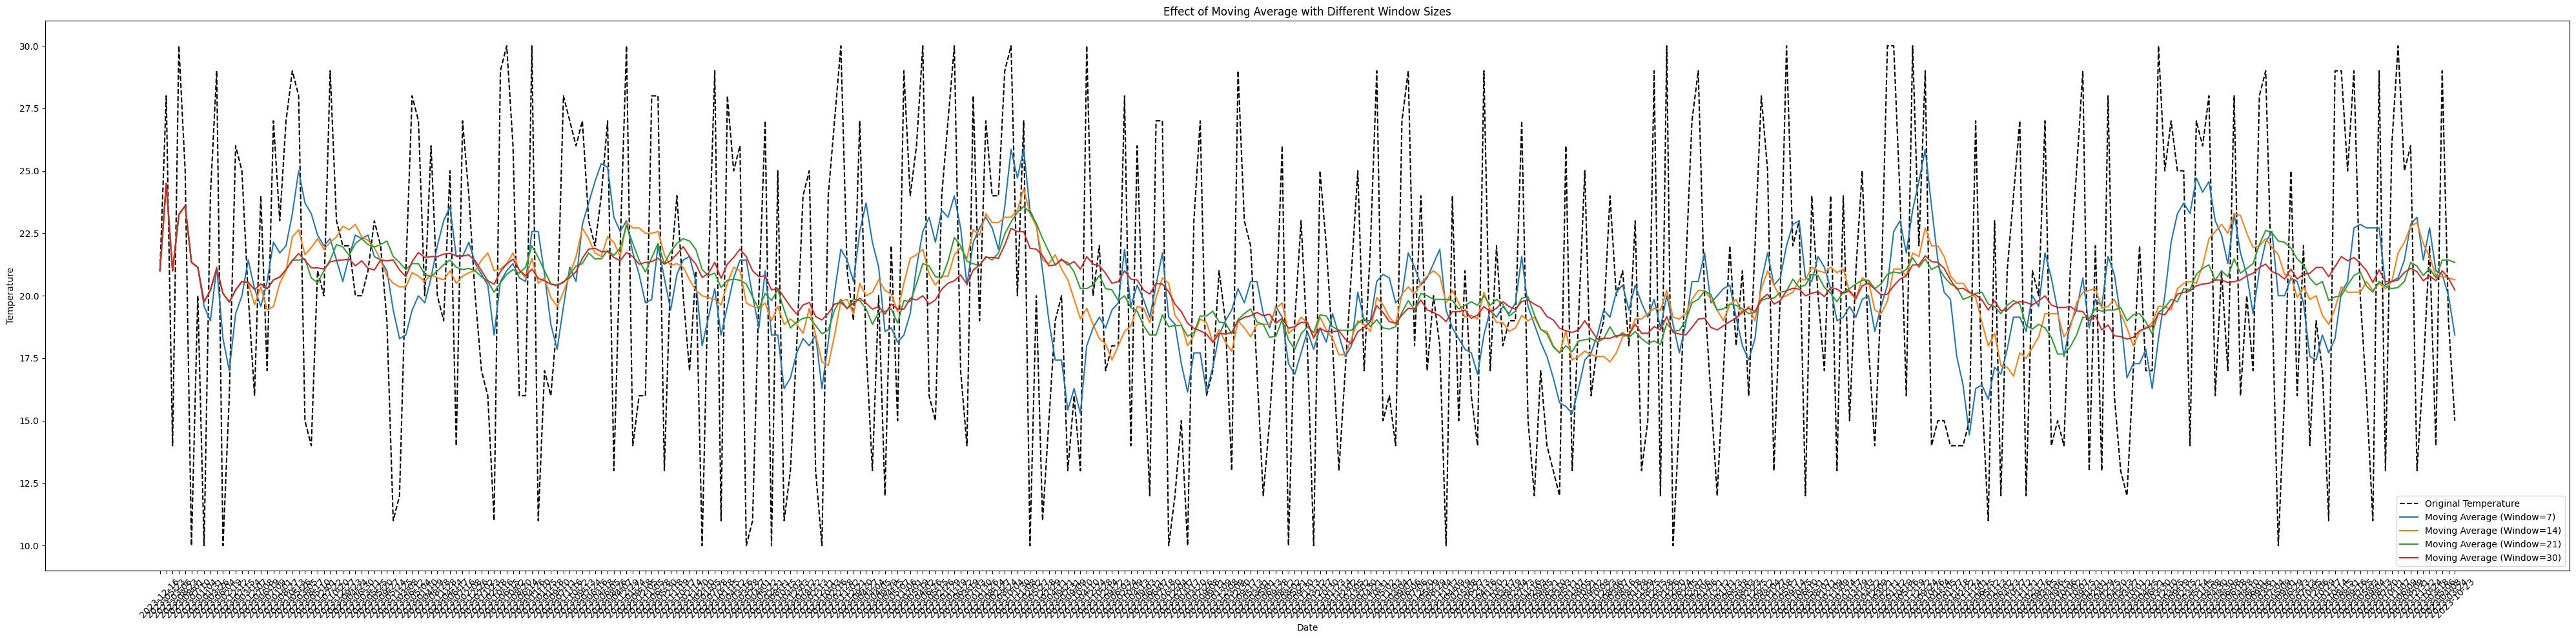

In [41]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'temp_df' with 'temperature' and 'date' columns
# You should have already created the 'smoothed_temp1' column using the moving_average function


# Function to calculate moving average
def moving_average(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()


# Set up plot
plt.figure(figsize=(40, 10))

# Plot original temperature data
# Plot original temperature data
plt.plot(
    temp_df["date"],
    temp_df["temperature"],
    label="Original Temperature",
    color="black",
    linestyle="dashed",
)

# Apply moving average with different window sizes
window_sizes = [7, 14, 21, 30]
for window_size in window_sizes:
    temp_df[f"smoothed_temp_{window_size}"] = moving_average(
        temp_df["temperature"], window_size
    )
    plt.plot(
        temp_df["date"],
        temp_df[f"smoothed_temp_{window_size}"],
        label=f"Moving Average (Window={window_size})",
    )
# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Effect of Moving Average with Different Window Sizes")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Alternatively, adjust tick frequency
# plt.xticks(temp_df['date'][::30], rotation=45)  # Adjust the frequency according to your preference

plt.legend()
plt.tight_layout()
plt.show()

In [42]:
#  Weighted moving average
def weighted_moving_average(data, window_size, weights):
    return data.rolling(window=window_size).apply(
        lambda x: np.dot(x, weights) / sum(weights), raw=True
    )

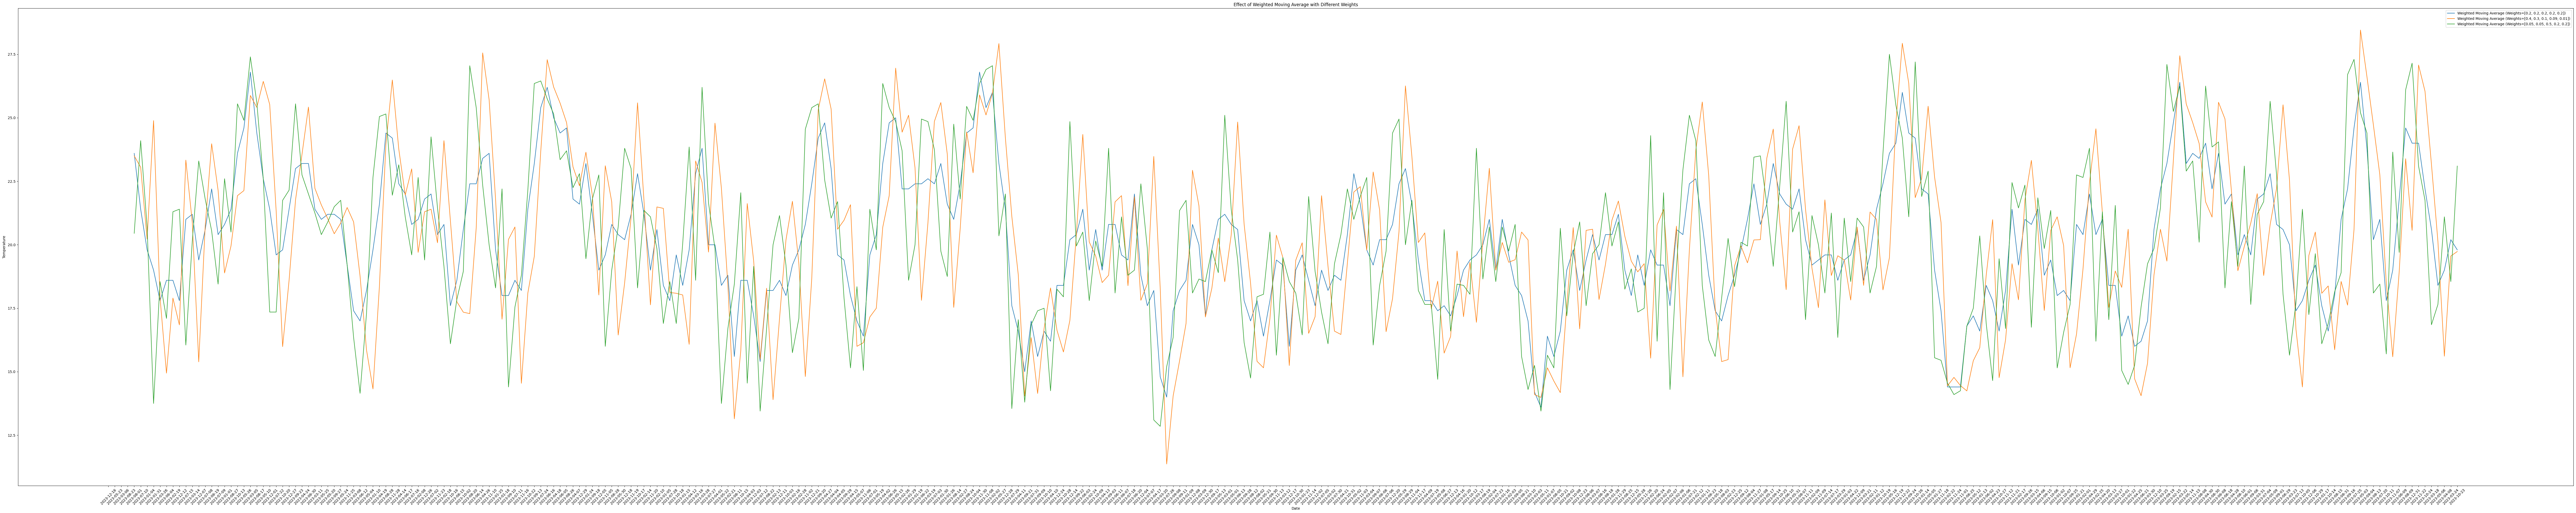

In [43]:
# Apply weighted moving average with different weights

plt.figure(figsize=(100, 20))
weights_list = [
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.4, 0.3, 0.1, 0.09, 0.01],
    [0.05, 0.05, 0.5, 0.2, 0.2],
]
for weights in weights_list:
    window_size = len(weights)  # Adjust window size based on the number of weights
    temp_df[f"weighted_smoothed_temp_{weights}"] = weighted_moving_average(
        temp_df["temperature"], window_size, weights
    )
    plt.plot(
        temp_df["date"],
        temp_df[f"weighted_smoothed_temp_{weights}"],
        label=f"Weighted Moving Average (Weights={weights})",
    )

# Add labels and legend
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Effect of Weighted Moving Average with Different Weights")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Exercise 03 : 


In [44]:
# Create an identity matrix In of shape (n, n), and the ones matrix Jn of shape (n, n)
# containing only 1s, then calculate the centering matrix Cn = In -1/n*Jn, where n
# represents the number of rows of M.
import numpy as np

DISPLAY: bool = True
M = np.array(
    [
        [12, 3, 6],
        [17, 13, -2],
        [12, 13, 3],
        [6, 13.5, -2.5],
        [17, 21, 7],
        [4, 20.5, -1],
    ],
    dtype=float,
)
n = 6
if n != M.shape[0]:
    raise ValueError(f"{n} is different from the number of rows on M")
id_mat = np.identity(n)
ones_mat = np.ones((n, n))
cn_mat = id_mat - ((1 / n) * ones_mat)
# Calculate the centered matrix Mc = Cn*M
M_cent = np.matmul(cn_mat, M)
if DISPLAY:
    print(M)
    print()
    print(cn_mat)
    print()
    print(M_cent)

[[12.   3.   6. ]
 [17.  13.  -2. ]
 [12.  13.   3. ]
 [ 6.  13.5 -2.5]
 [17.  21.   7. ]
 [ 4.  20.5 -1. ]]

[[ 0.83333333 -0.16666667 -0.16666667 -0.16666667 -0.16666667 -0.16666667]
 [-0.16666667  0.83333333 -0.16666667 -0.16666667 -0.16666667 -0.16666667]
 [-0.16666667 -0.16666667  0.83333333 -0.16666667 -0.16666667 -0.16666667]
 [-0.16666667 -0.16666667 -0.16666667  0.83333333 -0.16666667 -0.16666667]
 [-0.16666667 -0.16666667 -0.16666667 -0.16666667  0.83333333 -0.16666667]
 [-0.16666667 -0.16666667 -0.16666667 -0.16666667 -0.16666667  0.83333333]]

[[  0.66666667 -11.           4.25      ]
 [  5.66666667  -1.          -3.75      ]
 [  0.66666667  -1.           1.25      ]
 [ -5.33333333  -0.5         -4.25      ]
 [  5.66666667   7.           5.25      ]
 [ -7.33333333   6.5         -2.75      ]]


In [45]:
# Reduce the Data
# Divide In by n and get NIn.
N = id_mat / n

# Calculate variance matrix VarM = Mc
var_m = (M_cent.T @ N) @ M_cent
print(var_m)

[[24.55555556 -3.16666667  9.16666667]
 [-3.16666667 35.75       -3.875     ]
 [ 9.16666667 -3.875      14.47916667]]


In [46]:
# get the diagonal elements
diag_elemets = np.diagonal(var_m)
# create a matrix containing only the diagonal elements
print(diag_elemets)
print()
var_v = np.diag(diag_elemets)
print(var_v)

[24.55555556 35.75       14.47916667]

[[24.55555556  0.          0.        ]
 [ 0.         35.75        0.        ]
 [ 0.          0.         14.47916667]]


In [47]:
# Another method

mask = np.eye(var_m.shape[0], dtype=bool)
print(mask)
diag_elm = var_m[mask]
var_v2 = np.diag(var_m[mask])
print(var_v2)

[[ True False False]
 [False  True False]
 [False False  True]]
[[24.55555556  0.          0.        ]
 [ 0.         35.75        0.        ]
 [ 0.          0.         14.47916667]]


In [48]:
# Calculate the inverse matrix IVarV of the matrix Varv (IVarV= Varv-1)
var_v_inv = np.linalg.inv(var_v)
print(var_v_inv)

[[0.04072398 0.         0.        ]
 [0.         0.02797203 0.        ]
 [0.         0.         0.06906475]]


In [49]:
# Calculate the reduced matrix Mr = McIVarv
m_red = M_cent @ var_v_inv
print(m_red)

[[ 0.02714932 -0.30769231  0.29352518]
 [ 0.23076923 -0.02797203 -0.25899281]
 [ 0.02714932 -0.02797203  0.08633094]
 [-0.21719457 -0.01398601 -0.29352518]
 [ 0.23076923  0.1958042   0.36258993]
 [-0.29864253  0.18181818 -0.18992806]]


In [56]:
# Calculate the covariance matrix:
# We have 3 features
cov_mat = np.cov(m_red, rowvar=False)
print(cov_mat)
print(type(cov_mat))

[[ 0.04886878 -0.0043287   0.03093851]
 [-0.0043287   0.03356643 -0.00898325]
 [ 0.03093851 -0.00898325  0.0828777 ]]
<class 'numpy.ndarray'>


In [61]:
# Calculate the eigenvalues, and the eigenvectors of Cov.
eig_values = (np.linalg.eig(cov_mat))[0]
eig_vectors = np.linalg.eig(cov_mat)[1]

print(eig_values)
print()
print(type(eig_vectors))
res = tuple(np.linalg.eig(cov_mat))
print(type(res))

[0.10260689 0.03020516 0.03250087]

<class 'numpy.ndarray'>
<class 'tuple'>


In [55]:
from scipy.linalg import eigh

eig_val, eig_vec = eigh(cov_mat)
print(eig_val)
print()
print(eig_vec)

[0.03020516 0.03250087 0.10260689]

[[ 0.7613581   0.40972948  0.5024496 ]
 [-0.3945103   0.90778064 -0.14246381]
 [-0.51448564 -0.08975556  0.85278864]]


In [52]:
# Filter the eigenvectors, and keep only the vectors, which explain 90% of the variance.
ids = np.argsort(eig_values)
print(ids)

[1 2 0]
